# Vendor Performance Analysis

**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [3]:
conn = sqlite3.connect('inventory.db')

In [4]:
df = pd.read_sql_query('SELECT * FROM vendor_sales_summary',conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalFreightCost,Store,City,AvgSalesPrice,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,GrossProfit,GrossProfitMargin,StockTurnover,SalesToPurchaseRatio
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",90085,Ch Lilian 09 Ladouys St Este,23.86,2,47.72,27.08,67,EANVERNESS,36.99,4,147.96,0.44,52.52,35.50,2.00,3.10
1,2,"IRA GOLDMAN AND WILLIAMS, LLP",90085,Ch Lilian 09 Ladouys St Este,23.86,1,23.86,27.08,69,MOUNTMEND,36.99,4,147.96,0.44,52.52,35.50,4.00,6.20
2,2,"IRA GOLDMAN AND WILLIAMS, LLP",90085,Ch Lilian 09 Ladouys St Este,23.86,5,119.30,27.08,73,DONCASTER,36.99,5,184.95,0.56,65.65,35.50,1.00,1.55
3,2,"IRA GOLDMAN AND WILLIAMS, LLP",90609,Flavor Essence Variety 5 Pak,17.00,32,544.00,27.08,6,GOULCREST,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00
4,2,"IRA GOLDMAN AND WILLIAMS, LLP",90609,Flavor Essence Variety 5 Pak,17.00,32,544.00,27.08,34,PITMERDEN,24.99,2,49.98,0.04,15.98,31.97,0.06,0.09


In [5]:
df.shape

(245396, 18)

## Exploratory Data Analysis

- Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.


### **Summary Statistics**

Changing VendorNumber,Brand and Store datatype to object

In [5]:
df[["VendorNumber","Brand","Store"]] = df[["VendorNumber","Brand","Store"]].astype("object")

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PurchasePrice,245396.0,15.288201,43.408284,0.36,6.53,9.69,16.270,5681.81
TotalPurchaseQuantity,245396.0,136.849672,324.251387,1.00,21.00,48.00,130.000,12705.00
TotalPurchaseDollars,245396.0,1311.760442,3844.374129,0.64,219.48,502.55,1180.370,248593.01
TotalFreightCost,245396.0,73773.995618,68439.329795,0.09,16978.67,61966.91,123780.220,257032.07
AvgSalesPrice,245396.0,20.265091,38.428978,0.00,9.92,13.99,21.990,4696.99
TotalSalesQuantity,245396.0,132.752192,320.166036,0.00,17.00,48.00,127.000,12552.00
TotalSalesDollars,245396.0,1815.695911,5228.395499,0.00,273.80,681.68,1664.975,312513.46
TotalExciseTax,245396.0,76.879979,329.543730,0.00,3.59,12.44,44.150,18389.61
GrossProfit,245396.0,556.689657,1491.098921,-4431.90,79.64,209.56,527.310,82550.22
GrossProfitMargin,245396.0,30.641452,10.217025,-174.58,26.09,31.86,36.180,84.15


In [49]:
df[df.GrossProfitMargin==-174.58]

,VendorNumber,VendorName,Brand,Description,PurchasePrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalFreightCost,Store,City,AvgSalesPrice,TotalSalesQuantity,TotalSalesDollars,TotalExciseTax,GrossProfit,GrossProfitMargin,StockTurnover,SalesToPurchaseRatio
39066,1590,DIAGEO CHATEAU ESTATE WINES,18572,Butterfly Kiss Moscato,8.21,6,49.26,7259.75,1,HARDERSFIELD,2.99,6,17.94,0.68,-31.32,-174.58,1.0,0.36
39067,1590,DIAGEO CHATEAU ESTATE WINES,18572,Butterfly Kiss Moscato,8.21,511,4195.31,7259.75,50,MOUNTMEND,2.99,511,1527.89,57.47,-2667.42,-174.58,1.0,0.36
39068,1590,DIAGEO CHATEAU ESTATE WINES,18572,Butterfly Kiss Moscato,8.21,2,16.42,7259.75,53,HILLFAR,2.99,2,5.98,0.22,-10.44,-174.58,1.0,0.36
39069,1590,DIAGEO CHATEAU ESTATE WINES,18572,Butterfly Kiss Moscato,8.21,12,98.52,7259.75,55,DRY GULCH,2.99,12,35.88,1.36,-62.64,-174.58,1.0,0.36
39070,1590,DIAGEO CHATEAU ESTATE WINES,18572,Butterfly Kiss Moscato,8.21,12,98.52,7259.75,61,AETHELNEY,2.99,12,35.88,1.35,-62.64,-174.58,1.0,0.36
39071,1590,DIAGEO CHATEAU ESTATE WINES,18572,Butterfly Kiss Moscato,8.21,10,82.10,7259.75,69,MOUNTMEND,2.99,10,29.90,1.12,-52.20,-174.58,1.0,0.36


**Distribution Plots for Numerical Columns**

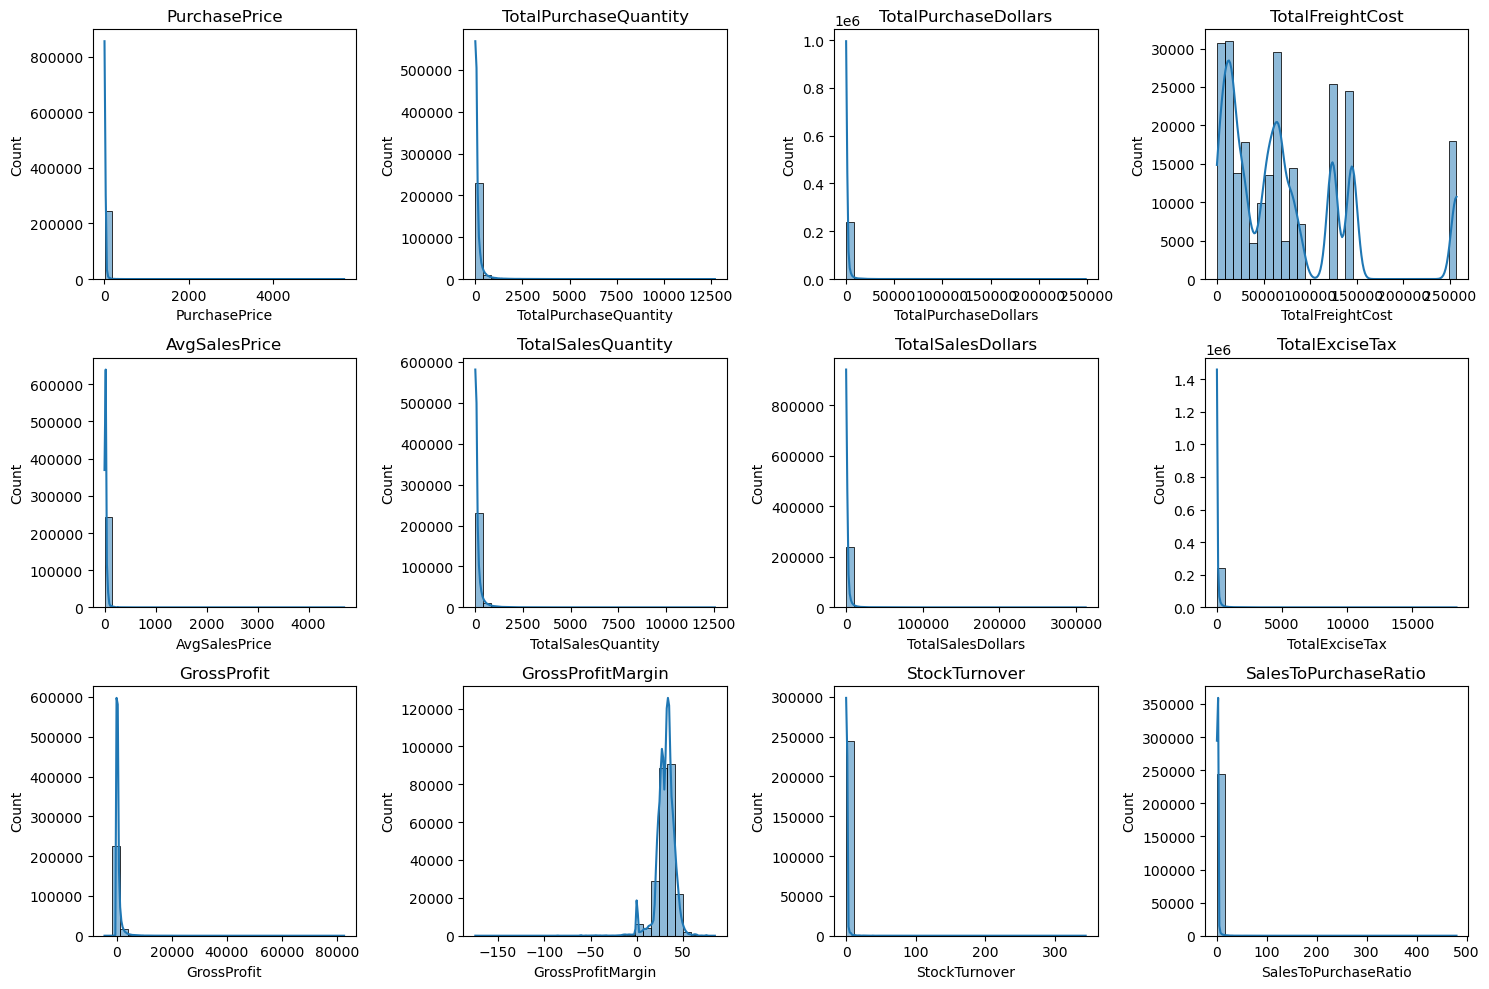

In [7]:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i+1)  
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

#### Numerical Columns Summary Statistics Insights

##### Negative & Zero Values

- **Gross Profit**: Minimum value is **-4,431.90**, indicating potential losses. This suggests some products or transactions might be sold at a loss due to higher purchase costs or discounted pricing.
- **Gross Profit Margin**: Shows a minimum of **-174.58**, suggesting cases where revenue is lower than costs or even zero, causing negative margins.
- **Total Sales Quantity & Sales Dollars**: Both have a **minimum value of 0.0**, indicating products that were possibly purchased but never sold. These could be obsolete or slow-moving items.

---

##### Outliers Indicated by High Standard Deviations

- **Purchase & Actual Prices**: The max values for **Purchase Price (5,681.81)** and **Avg Sales Price (4,696.99)** are significantly higher than their means (**15.29** and **20.27**, respectively), pointing to the presence of premium or high-value products.
- **Freight Cost**: Large variation from **0.09** to **257,032.07**, with a mean of **73,773.99** and a standard deviation of **68,439.33**. This suggests inconsistent shipping rates, possibly due to logistics inefficiencies or varying shipment sizes.
- **Stock Turnover**: Ranges from **0.0** to **344.0** (mean = **1.09**), suggesting that while some products move very slowly, others turn over extremely fast. Values greater than 1 imply that sales might be fulfilled from previous stock, indicating high demand.
- **Sales to Purchase Ratio**: Ranges from **0.0** to **479.74**, with a high standard deviation of **3.73**. This indicates extreme cases where some items are selling far more than were recorded as purchased—possibly due to returns, adjustments, or legacy inventory being sold.


In [8]:
df.describe(include="object").T

,count,unique,top,freq
VendorNumber,245396,126,4425,24503
VendorName,245396,128,MARTIGNETTI COMPANIES,24503
Brand,245396,10663,5299,156
Description,245396,9651,Southern Comfort,715
Store,245396,80,50,7664
City,245396,68,MOUNTMEND,19297


**CountPlots for Categorical Columns**

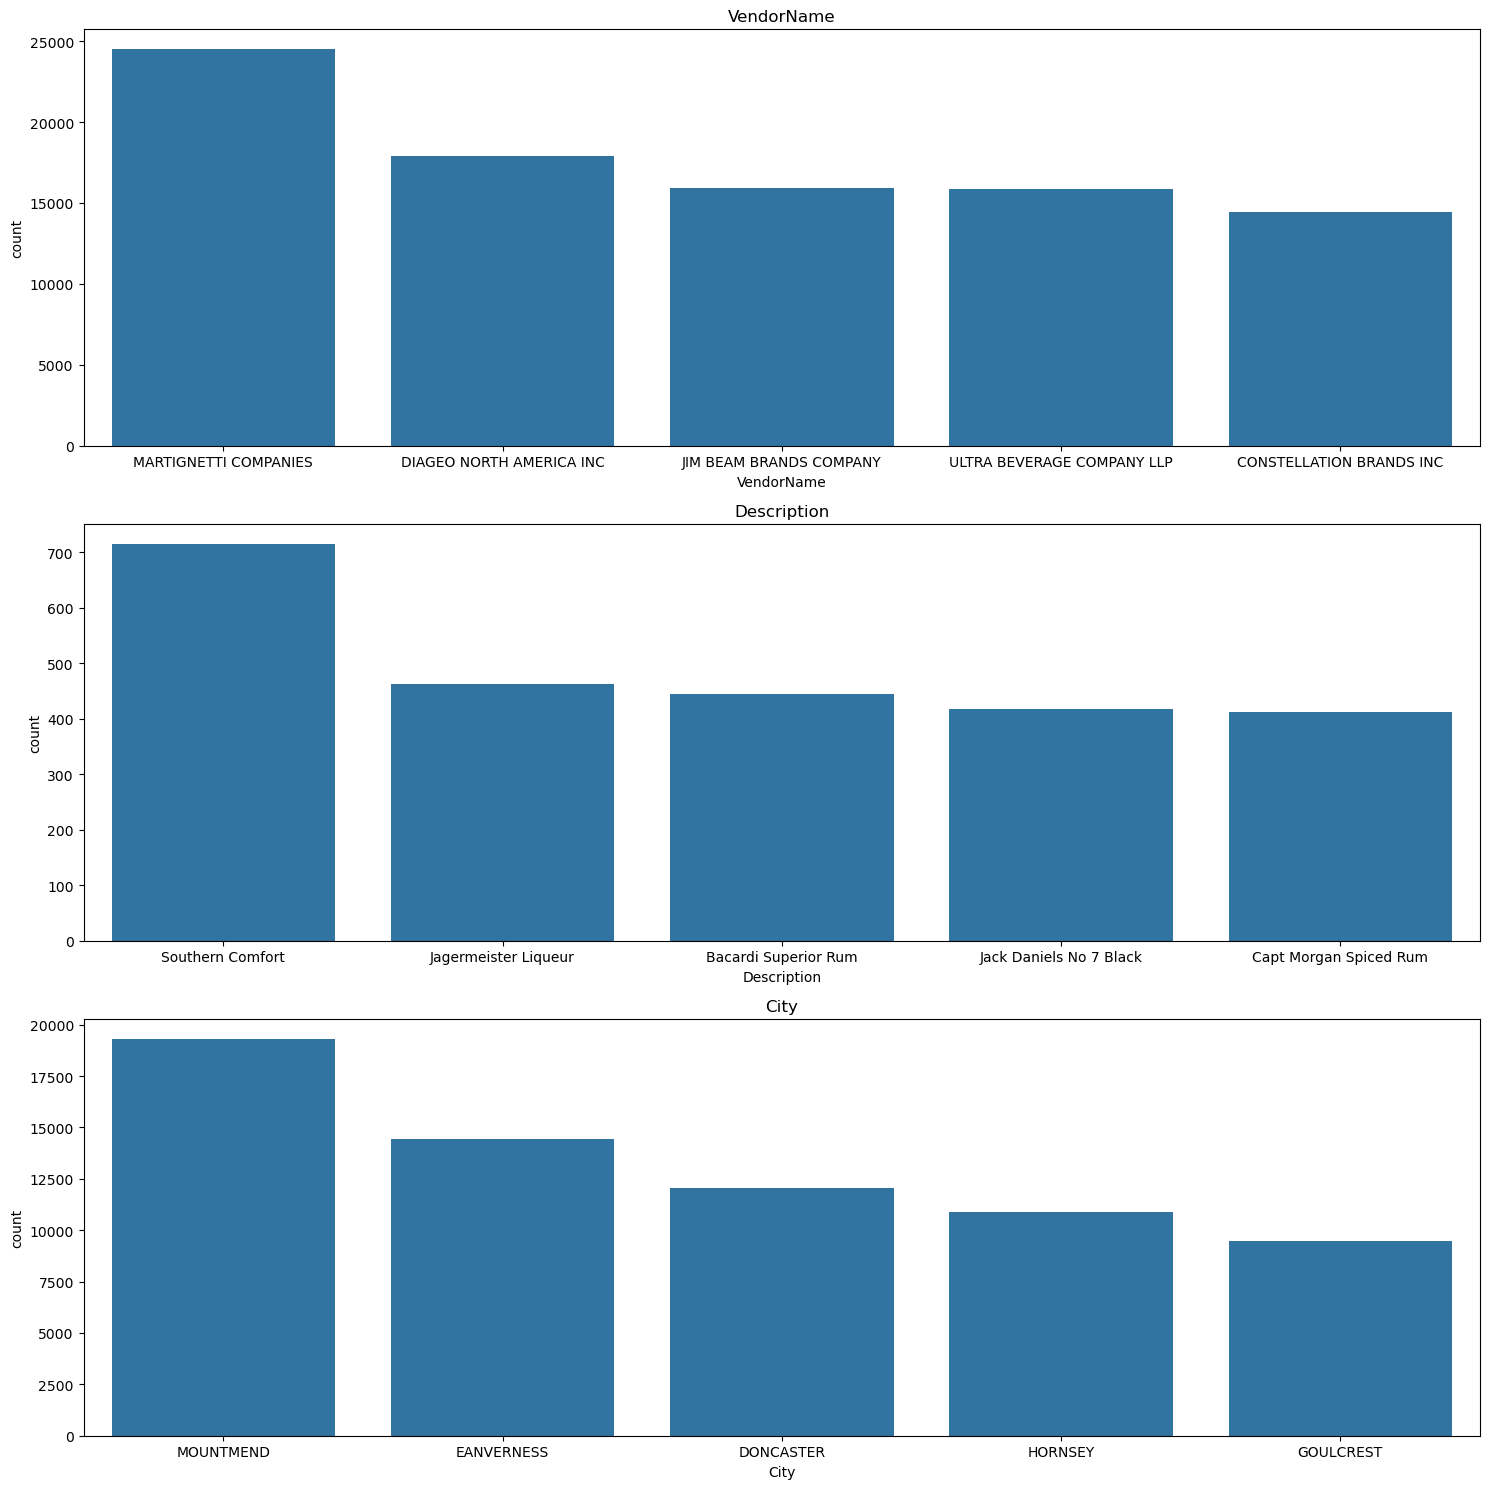

In [9]:
categorical_cols = ["VendorName","Description","City"]

plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 1, i+1)  
    sns.countplot(data=df,x=col,order=df[col].value_counts().index[:5])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Categorical Columns Summary Insights

##### Vendor Name
- **Total Vendors**: 128 unique vendors across the dataset.
- **Top Vendor**: `MARTIGNETTI COMPANIES` appears **24,503 times**.
- This vendor likely has a strong presence or long-standing relationship in the supply chain.

##### Store (Store Number)
- **Total Stores**: 80 unique stores.
- **Top Store**: **Store No. 50** has the highest number of entries (**7,664** records).
- This could indicate a high-performing or high-volume store.

##### City
- **Total Cities**: 68 different cities.
- **Top City**: `MOUNTMEND` has the highest frequency, appearing **19,297 times**.
- This suggests either multiple stores in that city or high transaction volume.

##### Description
- **Total Products**: 9,651 unique product descriptions.
- **Top Product**: `Southern Comfort` appears most frequently (**715 times**).
- Indicates a popular item across multiple stores or regions.


### **Correaltion**

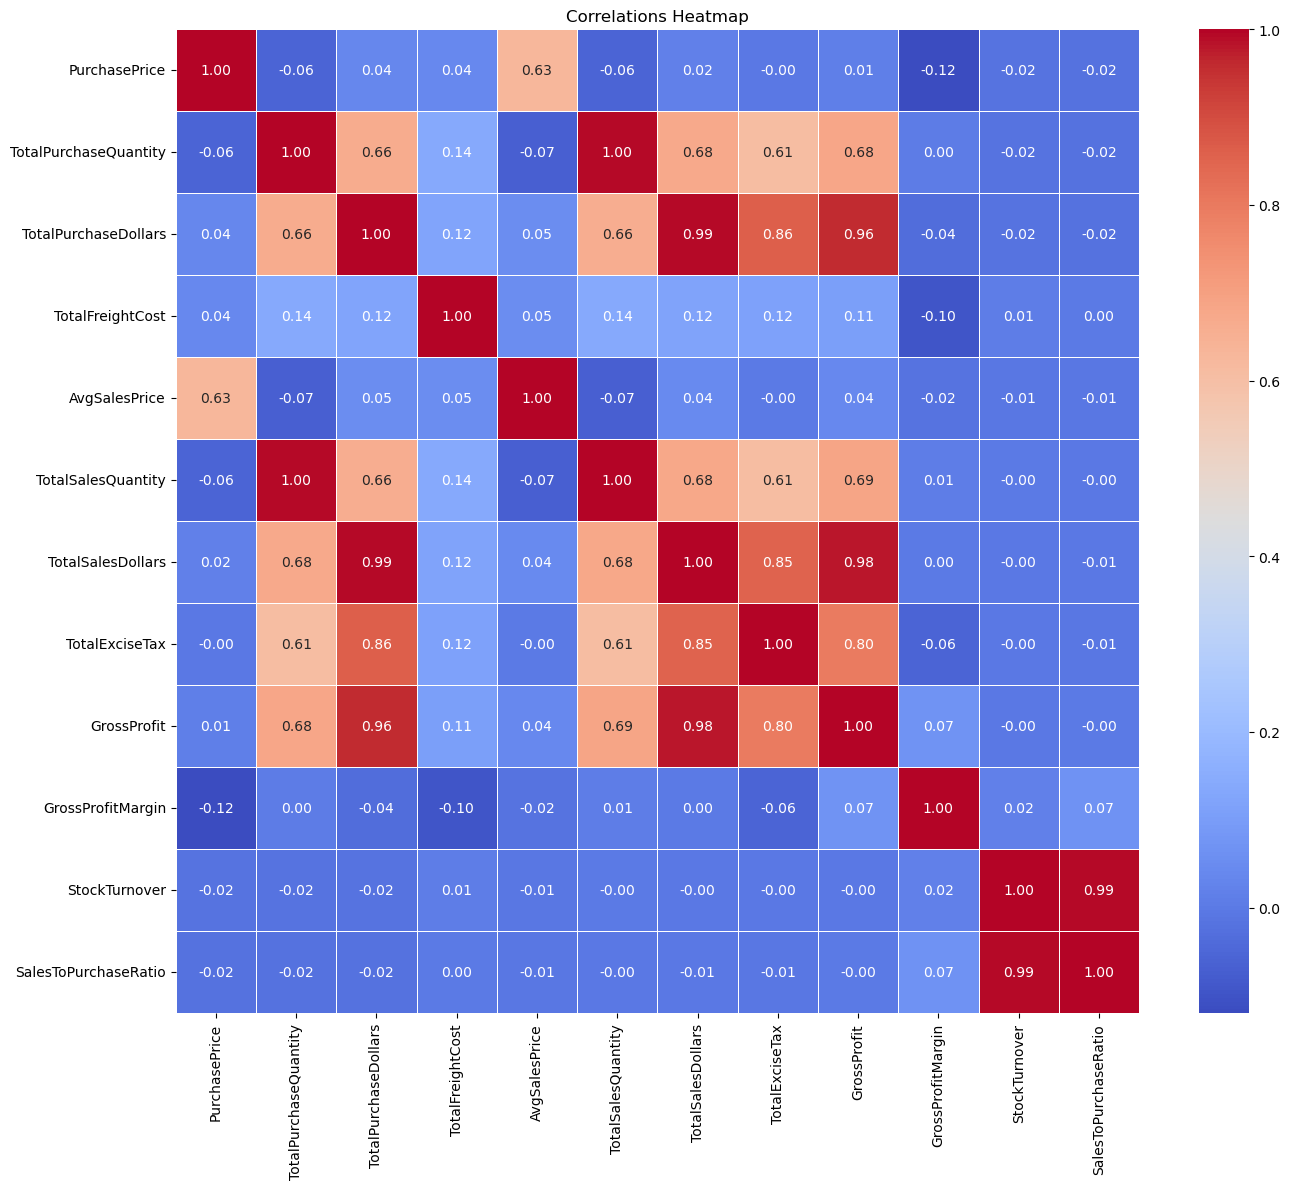

In [10]:
plt.figure(figsize=(14,12))
corr_mat = df[numerical_cols].corr()
sns.heatmap(corr_mat, annot=True, fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("Correlations Heatmap")
plt.tight_layout()
plt.show()

#### Correlation Insights Summary

1. **Sales Quantity , Sales Revenue and Gross Profit**
   There is obviously a good positive correlation (**0.68**) between `TotalSalesQuantity` and `TotalSalesDollars`, indicating that selling more units leads directly to higher revenue and (**0.98**) between `TotalSalesDollars` and `GrossProfit` showing that increased sales significantly contribute to profit.

2. **Purchase Price vs. Avg Sales Price**
   A moderate correlation (**0.63**) suggests that items bought at higher prices tend to be sold at higher prices, but not always proportionally.

3. **Total Excise Tax vs. Sales Revenue**
   `TotalExciseTax` shows a strong correlation (**0.85**) with `TotalSalesDollars`, indicating excise tax is a significant contributor to the final sale value, possibly due to higher-taxed premium products.

4. **Gross Profit vs. Total Purchase Dollars**
   A high correlation (**0.96**) between `GrossProfit` and `TotalPurchaseDollars` implies that profit scales with investment in inventory, not just sales.

5. **Stock Turnover and Sales to Purchase Ratio has Low Correlation with Other Metrics**
   `StockTurnover` and `SalesToPurchaseRatio` shows low correlations with most variables, suggesting they are influenced by other operational factors like inventory efficiency or product lifecycle, rather than just purchase/sales figures.

## Data Analysis

### Identify Brands that needs Promotion or Pricing adjustment which exhibits lower sales performance but higher profit margins

In [24]:
brand_performance = df.groupby('Description').agg({"TotalSalesDollars" : "sum",
                                                   "GrossProfitMargin" : "mean" }).reset_index()
brand_performance

,Description,TotalSalesDollars,GrossProfitMargin
0,(RI) 1,21268.16,25.404211
1,.nparalleled Svgn Blanc,1094.63,32.920000
2,10 Span Cab Svgn CC,2703.89,33.780000
3,10 Span Chard CC,3325.56,31.510000
4,10 Span Pnt Gris Monterey Cy,2082.22,34.580000
...,...,...,...
9646,Zuccardi Q Malbec,1639.18,35.070000
9647,Zum Rsl,10857.34,34.570000
9648,Zwack Liqueur,227.88,15.373333
9649,g Sake,819.92,-37.166667


In [43]:
low_sales_threshold = brand_performance.TotalSalesDollars.quantile(0.15)
high_margin_threshold = brand_performance.GrossProfitMargin.quantile(0.85)
print("Low Sales Threshold : ",low_sales_threshold)
print("High Margin Threshold : ",high_margin_threshold)

Low Sales Threshold :  194.92
High Margin Threshold :  37.39375


In [154]:
target_brands = brand_performance[
                ( brand_performance.TotalSalesDollars <= low_sales_threshold ) &
                ( brand_performance.GrossProfitMargin >= high_margin_threshold ) ]

In [159]:
target_brands.sort_values(by="TotalSalesDollars",ascending=True)

,Description,TotalSalesDollars,GrossProfitMargin
2537,Concannon Glen Ellen Wh Zin,9.98,73.55
7777,Santa Rita Organic Svgn Bl,9.99,66.47
1448,Camelot Chard,9.99,45.55
2284,Cherry On Top Sweet White,12.99,45.03
8191,Snoqualmie Cabernet/Merlot,12.99,50.35
...,...,...,...
4209,Grooner Gruner Veltliner,183.81,38.48
882,Beyond Svgn Bl,188.66,49.47
1750,Cavit Chard,188.79,56.73
1165,Bowmore Legend Single Malt,188.93,37.83


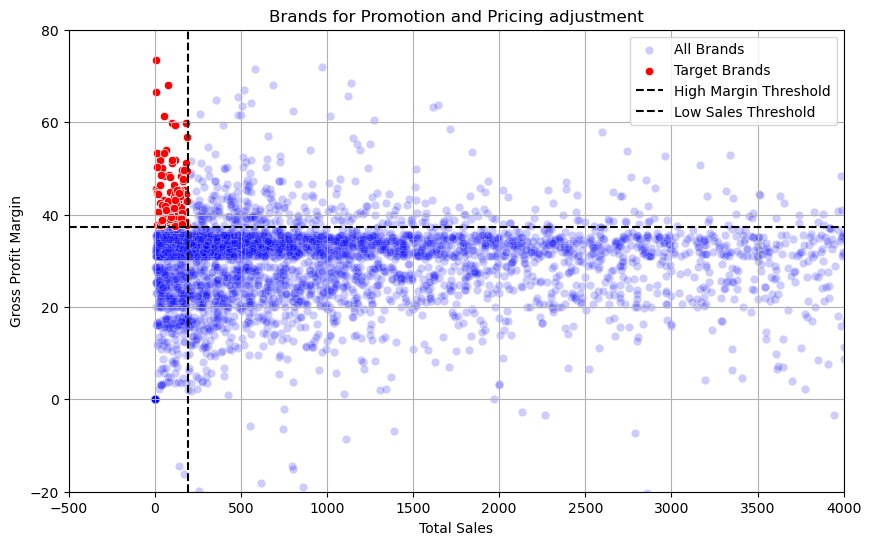

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance,x='TotalSalesDollars',y='GrossProfitMargin',label="All Brands",color='blue',alpha=0.2)
sns.scatterplot(data=target_brands,x='TotalSalesDollars',y='GrossProfitMargin',label="Target Brands",color='red',alpha=1)
plt.axhline(high_margin_threshold,linestyle="--",color="black",label="High Margin Threshold")
plt.axvline(low_sales_threshold,linestyle="--",color="black",label="Low Sales Threshold")
plt.ylim([-20,80])
plt.xlim([-500,4000])
plt.legend()
plt.xlabel("Total Sales")
plt.ylabel("Gross Profit Margin")
plt.title("Brands for Promotion and Pricing adjustment")
plt.grid(True)
plt.show()

#### **Insight: High Margin, Low Sales Brands**

Several brands such as **Concannon Glen Ellen Wh Zin**, **Santa Rita Organic Svgn Bl**, **Camelot Chard**, **Cherry On Top Sweet White**, and **Snoqualmie Cabernet/Merlot** have very low total sales (below **$15**), yet they maintain a high gross profit margin (above **40%**).

This suggests that while their sales volume is currently limited, their profitability per unit is strong. These brands could consider adjusting their **pricing strategy** or increasing **marketing and promotional efforts** to boost sales. Even with a slightly reduced margin, higher sales volume could lead to a greater **overall gross profit**.


### Which Brands demonstrate high Purchases, Sales , Stock Turnovers and Gross Profit Margins

In [187]:
top_brands = df.groupby("Description").agg(
    Total_Purchases = ("TotalPurchaseDollars","sum"),
    Total_Sales = ("TotalSalesDollars","sum"),
    Stock_Turnover = ("StockTurnover","mean"),
    Profit_Margin = ("GrossProfitMargin","mean")
)
top_brands

,Total_Purchases,Total_Sales,Stock_Turnover,Profit_Margin
Description,,,,
(RI) 1,17632.60,21268.16,0.916842,25.404211
.nparalleled Svgn Blanc,766.48,1094.63,0.916667,32.920000
10 Span Cab Svgn CC,2137.76,2703.89,0.816667,33.780000
10 Span Chard CC,2400.84,3325.56,0.984444,31.510000
10 Span Pnt Gris Monterey Cy,1411.20,2082.22,0.895000,34.580000
...,...,...,...,...
Zuccardi Q Malbec,1246.08,1639.18,0.853750,35.070000
Zum Rsl,7309.70,10857.34,0.950476,34.570000
Zwack Liqueur,189.93,227.88,0.666667,15.373333


In [142]:
def format_dollar(x) :
    if x>=1_000_000 :
        return f'{x/1_000_000:0.2f}M'
    elif x>=1000 :
        return f'{x/1000:0.2f}K'
    else : return f'{x:0.2f}'

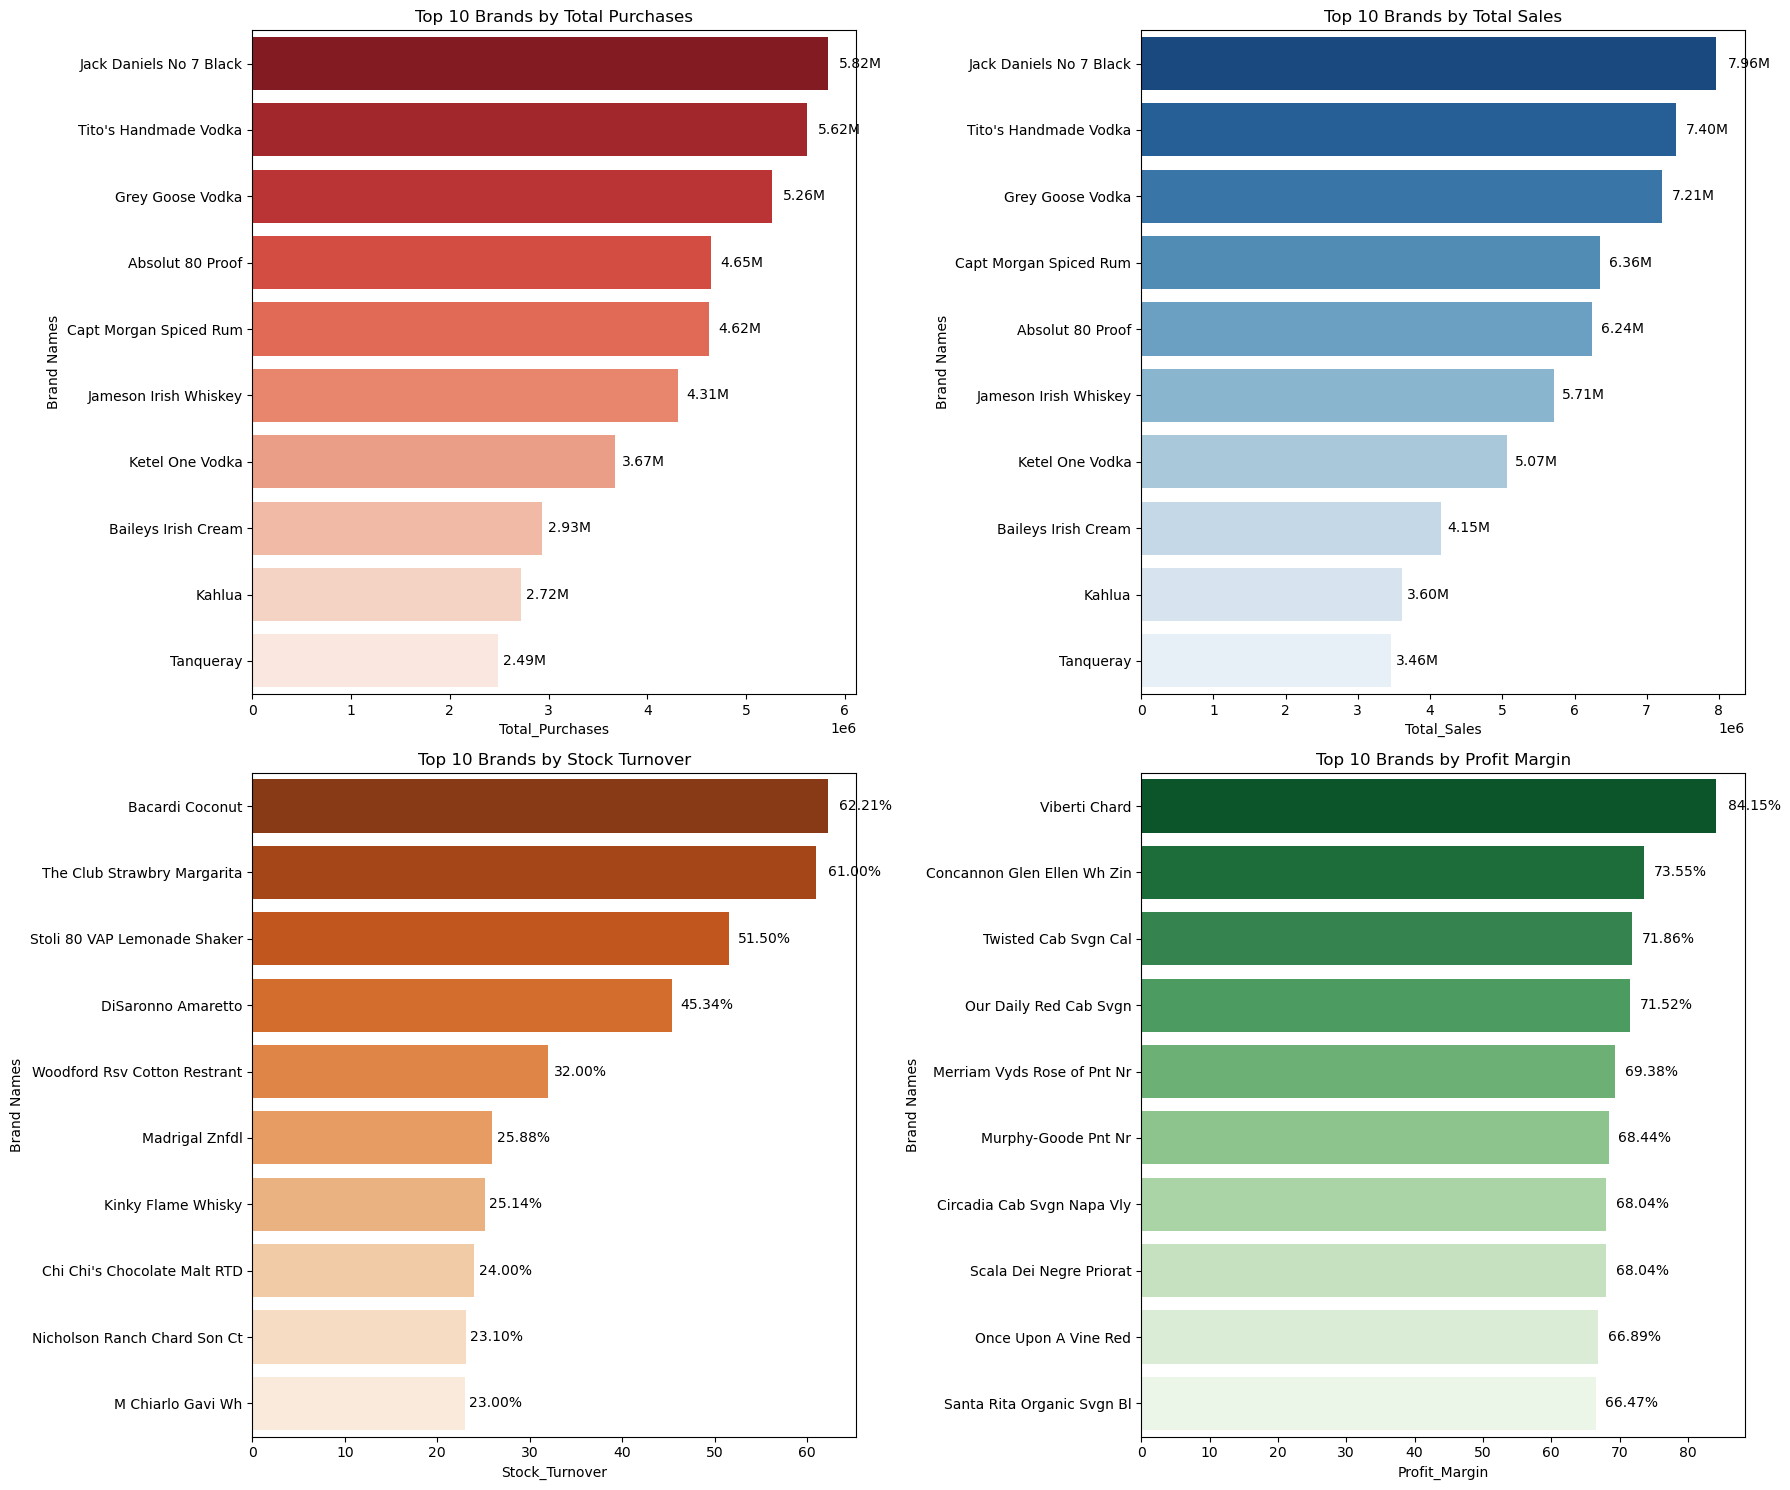

In [153]:
palette = ["Reds_r","Blues_r","Oranges_r","Greens_r"]
plt.figure(figsize=(18,15))

for i,col in enumerate(top_brands.columns.values) :
    plt.subplot(2,2,i+1)
    ax1 = sns.barplot(y=top_brands[col].sort_values(ascending=False).head(10).index,
                      x=top_brands[col].sort_values(ascending=False).head(10).values,
                      palette=palette[i])
    ax1.set_xlabel(col)
    ax1.set_ylabel("Brand Names")
    plt.title(f"Top 10 Brands by {' '.join(col.split('_'))}")
    for bar in ax1.patches:
        value = format_dollar(bar.get_width()) if col in ['Total_Purchases', 'Total_Sales'] else f'{bar.get_width():0.2f}%'
        ax1.text(bar.get_width()*1.02,
                 bar.get_y()+bar.get_height()/2,
                 value,
                 ha='left',va='center',fontsize=10,color='black')
plt.tight_layout()
plt.show()

#### **Brand Insights Based on Key Metrics**

* **High Total Purchases and Sales**:
  Brands like **'Jack Daniels No 7 Black'**, **'Tito's Handmade Vodka'**, and **'Grey Goose Vodka'** have high total purchase values in dollars as well as high total sales, indicating strong market demand and brand popularity.

* **High Stock Turnover (Legacy Stock Effect)**:
  Brands such as **'Bacardi Coconut'**, **'The Club Strawberry Margarita'**, and **'Stoli 80 VAP Lemonade Shaker'** have a stock turnover rate above **45%**, suggesting they were sold in significantly higher quantities than purchased during the year—likely due to movement of legacy stock.

* **Exceptionally High Profit Margins**:
  Brands like **'Viberti Chard'**, **'Concannon Glen Ellen Wh Zin'**, and **'Twisted Cab Svgn Cal'** show profit margins exceeding **75%**, indicating these are low purchase-cost products sold at relatively high prices, resulting in strong gross profitability.


#### **Finding Top 5 Brands**

In [170]:
# Step 1: Compute ranks for each metric and store in arrays
rank_purchase = top_brands["Total_Purchases"].rank(ascending=False)
rank_sales = top_brands["Total_Sales"].rank(ascending=False)
rank_turnover = top_brands["Stock_Turnover"].rank(ascending=False)
rank_profit = top_brands["Profit_Margin"].rank(ascending=False)

# Step 2: Compute the final composite score
total_score = rank_purchase + rank_sales+ rank_turnover + rank_profit

# Step 3: Add only the final score to the DataFrame
top_brands["Total_Score"] = total_score

# Step 4: Get the top 5 brands based on the total score
top_5_brands = top_brands.sort_values("Total_Score").head(5)

# Display result
top_5_brands

,Total_Purchases,Total_Sales,Stock_Turnover,Profit_Margin,Total_Score
Description,,,,,
Jack Daniels Tennessee Fire,307995.09,462598.86,1.802792,51.224351,1178.0
Liberty School Cab Svgn,133564.14,232587.36,1.966702,42.920106,1877.0
Dom Perignon,395736.96,588733.77,1.506316,39.095789,2259.0
J Lohr Seven Oaks Cab Svgn,225660.47,454423.47,1.135140,44.587477,2388.0
Banfi Chianti Clsc RSV,133201.44,219699.09,1.665750,39.927625,2490.0


**Top 5 Performing Brands Based on Composite Ranking**

The following brands have emerged as the top 5 based on their combined performance across four key attributes: Total Purchases, Total Sales, Stock Turnover, and Profit Margin:

* **Jack Daniels Tennessee Fire**
* **Liberty School Cab Svgn**
* **Dom Perignon**
* **J Lohr Seven Oaks Cab Svgn**
* **Banfi Chianti Clsc RSV**

These brands exhibit strong performance indicators:

* **High Total Purchases**: All above \$100,000, indicating consistent procurement and demand.
* **High Total Sales**: Each exceeding \$200,000, reflecting strong customer preference and brand traction.
* **Stock Turnover > 1.5**: Suggests that the entire inventory purchased at the beginning of the year was sold out by the end, indicating efficient inventory management and product movement.
* **Profit Margin > 39%**: Implies healthy gross profitability, making these brands highly valuable from a business perspective.

These metrics highlight that the above brands are top contributors to both revenue and profitability, making them ideal candidates for continued focus and promotion.


### Which Vendors contributes the most to total purchase, sales and gross profit

In [118]:
Vendor_Contribution = df.groupby("VendorName").agg(
    Purchase_Contribution = ("TotalPurchaseDollars",lambda x : round(sum(x)/df.TotalPurchaseDollars.sum()*100,2)),
    Sales_Contribution = ("TotalSalesDollars",lambda x : round(sum(x)/df.TotalSalesDollars.sum()*100,2)),
    Profit_Contribution = ("GrossProfit",lambda x : round(sum(x)/df.GrossProfit.sum()*100,2))    
).reset_index()

#### **Purchase Contribution**

In [125]:
top_vendors = Vendor_Contribution.sort_values("Purchase_Contribution",ascending=False).head(10)
top_vendors

,VendorName,Purchase_Contribution,Sales_Contribution,Profit_Contribution
28,DIAGEO NORTH AMERICA INC,15.83,15.36,13.67
63,MARTIGNETTI COMPANIES,8.66,8.98,10.03
50,JIM BEAM BRANDS COMPANY,7.52,7.12,6.23
74,PERNOD RICARD USA,7.49,7.21,6.35
8,BACARDI USA INC,5.48,5.57,5.18
23,CONSTELLATION BRANDS INC,4.84,5.46,6.64
14,BROWN-FORMAN CORP,4.20,4.12,3.81
114,ULTRA BEVERAGE COMPANY LLP,4.10,3.85,3.80
33,E & J GALLO WINERY,3.82,4.14,4.80
59,M S WALKER INC,3.40,3.38,3.55


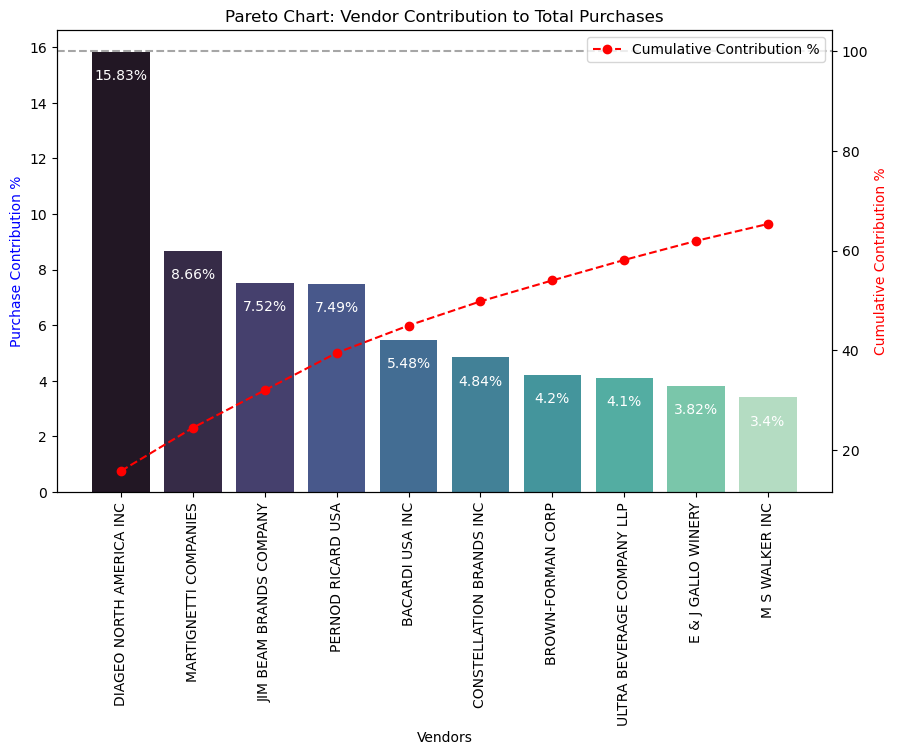

In [120]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(
    x=top_vendors['VendorName'],
    y=top_vendors['Purchase_Contribution'],
    palette="mako",
    ax=ax1
)

for i, value in enumerate(top_vendors['Purchase_Contribution']):
    ax1.text(i, value - 1, str(value) + '%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution
ax2 = ax1.twinx()
ax2.plot(
    top_vendors['VendorName'],
    top_vendors['Purchase_Contribution'].cumsum(),
    color='red',
    marker='o',
    linestyle='dashed',
    label='Cumulative Contribution %'
)

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()


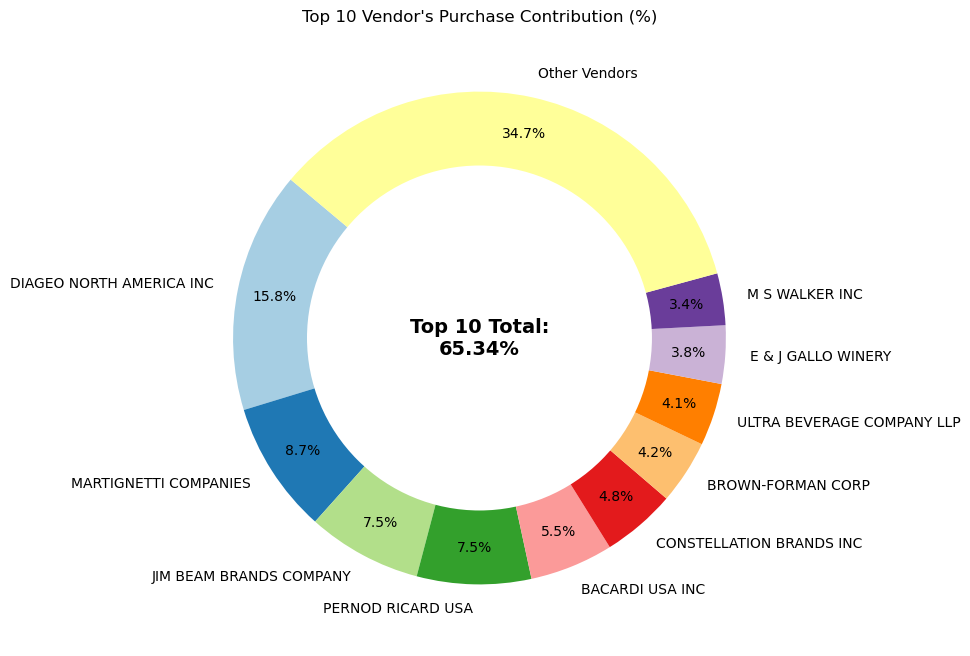

In [126]:
# Prepare vendor data
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['Purchase_Contribution'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add total contribution annotation in the center
plt.text(
    0, 0,
    f"Top 10 Total:\n{total_contribution:.2f}%",
    fontsize=14,
    fontweight='bold',
    ha='center',
    va='center'
)

# Add title
plt.title("Top 10 Vendor's Purchase Contribution (%)")

plt.show()


**Purchase Contribution Insights**

* **DIAGEO NORTH AMERICA INC** contributes **15.8%** alone to the total purchases, followed by **MARTIGNETTI COMPANIES** with **8.7%**.
* The **top 10 vendors** together account for **65.34%** of the total purchases made during the year.

#### **Sales Contribution**

In [127]:
top_vendors = Vendor_Contribution.sort_values("Sales_Contribution",ascending=False).head(10)
top_vendors

,VendorName,Purchase_Contribution,Sales_Contribution,Profit_Contribution
28,DIAGEO NORTH AMERICA INC,15.83,15.36,13.67
63,MARTIGNETTI COMPANIES,8.66,8.98,10.03
74,PERNOD RICARD USA,7.49,7.21,6.35
50,JIM BEAM BRANDS COMPANY,7.52,7.12,6.23
8,BACARDI USA INC,5.48,5.57,5.18
23,CONSTELLATION BRANDS INC,4.84,5.46,6.64
33,E & J GALLO WINERY,3.82,4.14,4.80
14,BROWN-FORMAN CORP,4.20,4.12,3.81
114,ULTRA BEVERAGE COMPANY LLP,4.10,3.85,3.80
59,M S WALKER INC,3.40,3.38,3.55


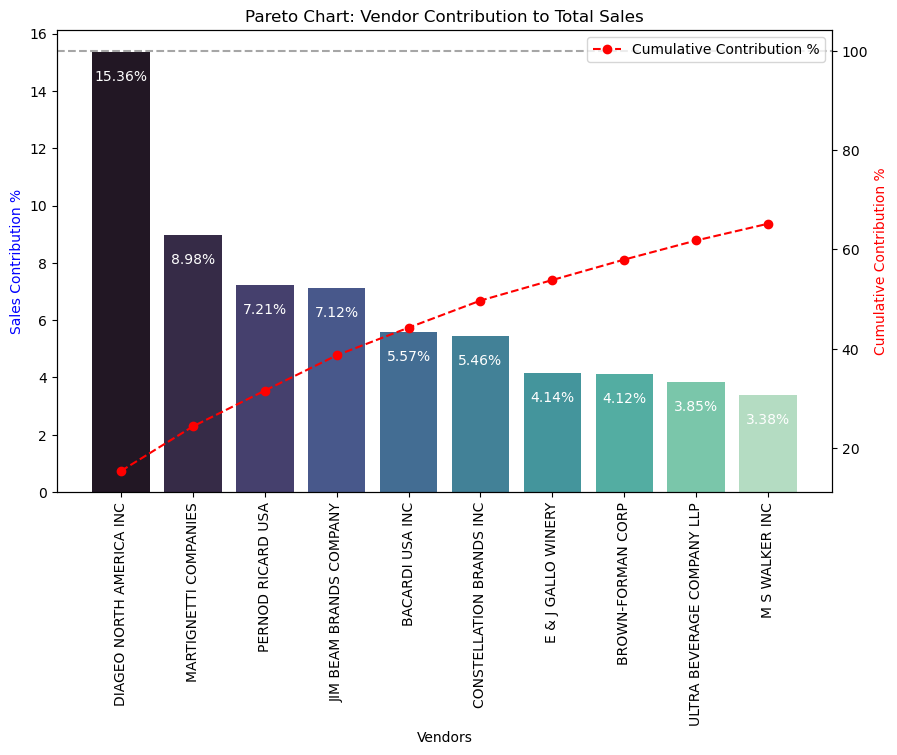

In [122]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Sales Contribution%
sns.barplot(
    x=top_vendors['VendorName'],
    y=top_vendors['Sales_Contribution'],
    palette="mako",
    ax=ax1
)

for i, value in enumerate(top_vendors['Sales_Contribution']):
    ax1.text(i, value - 1, str(value) + '%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution
ax2 = ax1.twinx()
ax2.plot(
    top_vendors['VendorName'],
    top_vendors['Sales_Contribution'].cumsum(),
    color='red',
    marker='o',
    linestyle='dashed',
    label='Cumulative Contribution %'
)

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Sales Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Sales')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()


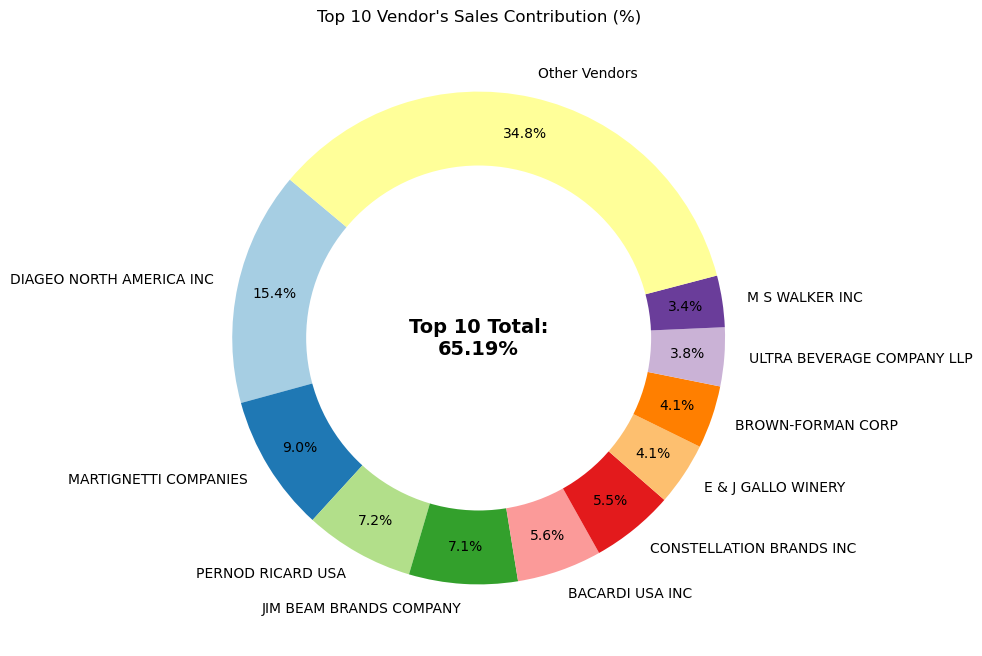

In [128]:
# Prepare vendor data
vendors = list(top_vendors['VendorName'].values)
Sales_contributions = list(top_vendors['Sales_Contribution'].values)
total_contribution = sum(Sales_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
Sales_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    Sales_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add total contribution annotation in the center
plt.text(
    0, 0,
    f"Top 10 Total:\n{total_contribution:.2f}%",
    fontsize=14,
    fontweight='bold',
    ha='center',
    va='center'
)

# Add title
plt.title("Top 10 Vendor's Sales Contribution (%)")

plt.show()


**Sales Contribution Insights**

* **DIAGEO NORTH AMERICA INC** contributes **15.4%** alone to the total sales, followed by **MARTIGNETTI COMPANIES** with **9.0%**.
* The **top 10 vendors** collectively contribute **65.19%** of the total sales made during the year.

#### **Gross Profit Contribution**

In [129]:
top_vendors = Vendor_Contribution.sort_values("Profit_Contribution",ascending=False).head(10)
top_vendors

,VendorName,Purchase_Contribution,Sales_Contribution,Profit_Contribution
28,DIAGEO NORTH AMERICA INC,15.83,15.36,13.67
63,MARTIGNETTI COMPANIES,8.66,8.98,10.03
23,CONSTELLATION BRANDS INC,4.84,5.46,6.64
74,PERNOD RICARD USA,7.49,7.21,6.35
50,JIM BEAM BRANDS COMPANY,7.52,7.12,6.23
8,BACARDI USA INC,5.48,5.57,5.18
33,E & J GALLO WINERY,3.82,4.14,4.80
14,BROWN-FORMAN CORP,4.20,4.12,3.81
114,ULTRA BEVERAGE COMPANY LLP,4.10,3.85,3.80
59,M S WALKER INC,3.40,3.38,3.55


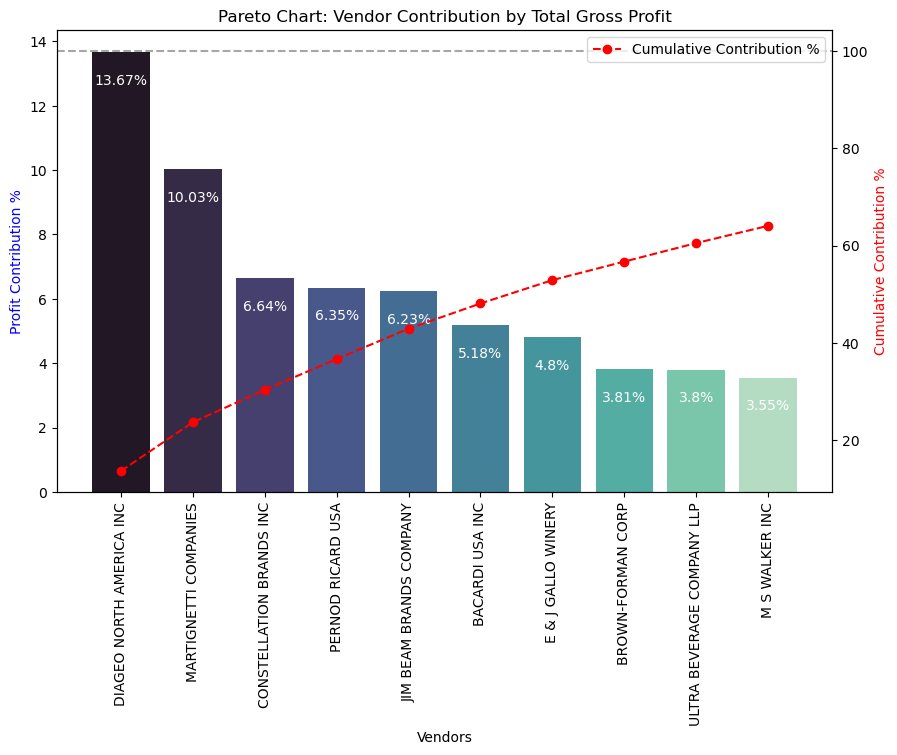

In [124]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Profit Contribution%
sns.barplot(
    x=top_vendors['VendorName'],
    y=top_vendors['Profit_Contribution'],
    palette="mako",
    ax=ax1
)

for i, value in enumerate(top_vendors['Profit_Contribution']):
    ax1.text(i, value - 1, str(value) + '%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution
ax2 = ax1.twinx()
ax2.plot(
    top_vendors['VendorName'],
    top_vendors['Profit_Contribution'].cumsum(),
    color='red',
    marker='o',
    linestyle='dashed',
    label='Cumulative Contribution %'
)

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Profit Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution by Total Gross Profit')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

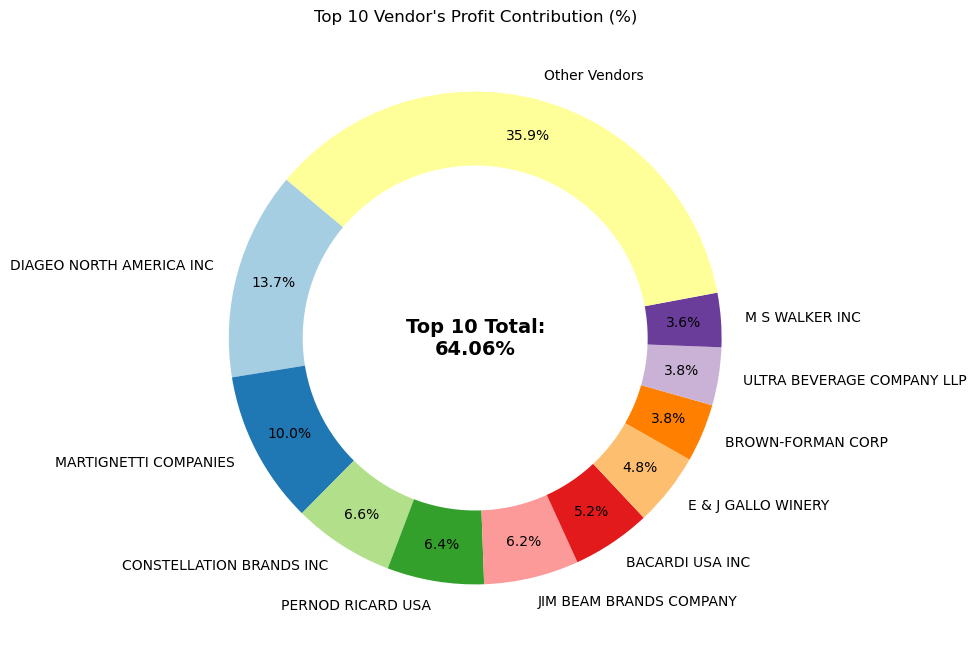

In [130]:
# Prepare vendor data
vendors = list(top_vendors['VendorName'].values)
Profit_contributions = list(top_vendors['Profit_Contribution'].values)
total_contribution = sum(Profit_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
Profit_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    Profit_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add total contribution annotation in the center
plt.text(
    0, 0,
    f"Top 10 Total:\n{total_contribution:.2f}%",
    fontsize=14,
    fontweight='bold',
    ha='center',
    va='center'
)

# Add title
plt.title("Top 10 Vendor's Profit Contribution (%)")

plt.show()


**Gross Profit Contribution Insights**

* **DIAGEO NORTH AMERICA INC** contributes **13.7%** alone to the total gross profit, followed by **MARTIGNETTI COMPANIES** with **10.0%**.
* The **top 10 vendors** together contribute **64.06%** of the total gross profit earned in this year.

#### **Finding Best Vendors**

In [251]:
# Step 1: Aggregate sum values per vendor
Vendor_Summary = df.groupby("VendorName").agg(
    Total_Purchase=("TotalPurchaseDollars", "sum"),
    Total_Sales=("TotalSalesDollars", "sum"),
    Stock_Turnover=("StockTurnover","mean"),
    Gross_Profit=("GrossProfit", "sum")
)

# Step 2: Rank each metric (higher is better, so ascending=False)
purchase_rank = Vendor_Summary["Total_Purchase"].rank(ascending=False)
sales_rank = Vendor_Summary["Total_Sales"].rank(ascending=False)
stock_rank = Vendor_Summary["Stock_Turnover"].rank(ascending=False)
profit_rank = Vendor_Summary["Gross_Profit"].rank(ascending=False)

# Step 3: Combine ranks and store in array
total_rank_array = (purchase_rank + sales_rank + stock_rank + profit_rank).values

# Step 4: Store only the final combined rank in the DataFrame
Vendor_Summary["Final_Rank"] = total_rank_array

# Step 5: Get top 5 vendors
top_5_vendors = Vendor_Summary.sort_values(by="Final_Rank").head(5)

# Display the result
top_5_vendors.sort_values(by="Gross_Profit",ascending=False).map(format_dollar)

,Total_Purchase,Total_Sales,Stock_Turnover,Gross_Profit,Final_Rank
VendorName,,,,,
DIAGEO NORTH AMERICA INC,50.96M,68.43M,1.18,18.68M,25.00
MARTIGNETTI COMPANIES,27.86M,40.00M,1.05,13.70M,51.00
CONSTELLATION BRANDS INC,15.57M,24.31M,1.07,9.07M,55.00
PERNOD RICARD USA,24.12M,32.13M,1.11,8.67M,40.00
BACARDI USA INC,17.62M,24.81M,1.59,7.07M,23.00


**Top 5 Vendors Summary**

The **top 5 vendors** based on combined performance in purchase volume, sales revenue, and gross profit are:

1. **DIAGEO NORTH AMERICA INC**
2. **MARTIGNETTI COMPANIES**
3. **CONSTELLATION BRANDS INC**
4. **PERNOD RICARD USA**
5. **BACARDI USA INC**

All of these vendors have:

* **Total purchases above \$15 million**
* **Total sales above \$24 million**
* **Stock Turnover above 1**
* **Gross profit above \$9 million** in this financial year

### City wise Analysis

In [188]:
top_City = df.groupby(["City"]).agg(
    Total_Purchases = ("TotalPurchaseDollars","sum"),
    Total_Sales = ("TotalSalesDollars","sum"),
    Stock_Turnover = ("StockTurnover","mean"),
    Gross_Profit = ("GrossProfit","sum")
)
top_City

,Total_Purchases,Total_Sales,Stock_Turnover,Gross_Profit
City,,,,
ABERDEEN,2758454.71,3936778.26,1.129045,1203677.58
AETHELNEY,4006056.03,5591446.82,1.192472,1622202.76
ALNERWICK,2474462.68,3487639.79,1.227146,1062557.26
ARBINGTON,5546941.35,7741153.10,1.133984,2401111.23
ASHBORNE,4504046.53,6363070.37,1.079973,1917790.22
...,...,...,...,...
TYWARDREATH,583891.69,1195608.31,1.944036,390327.57
VERITAS,1018553.63,1436069.72,1.108506,436175.59
WANBORNE,7599487.84,10281536.83,1.009030,3135864.90


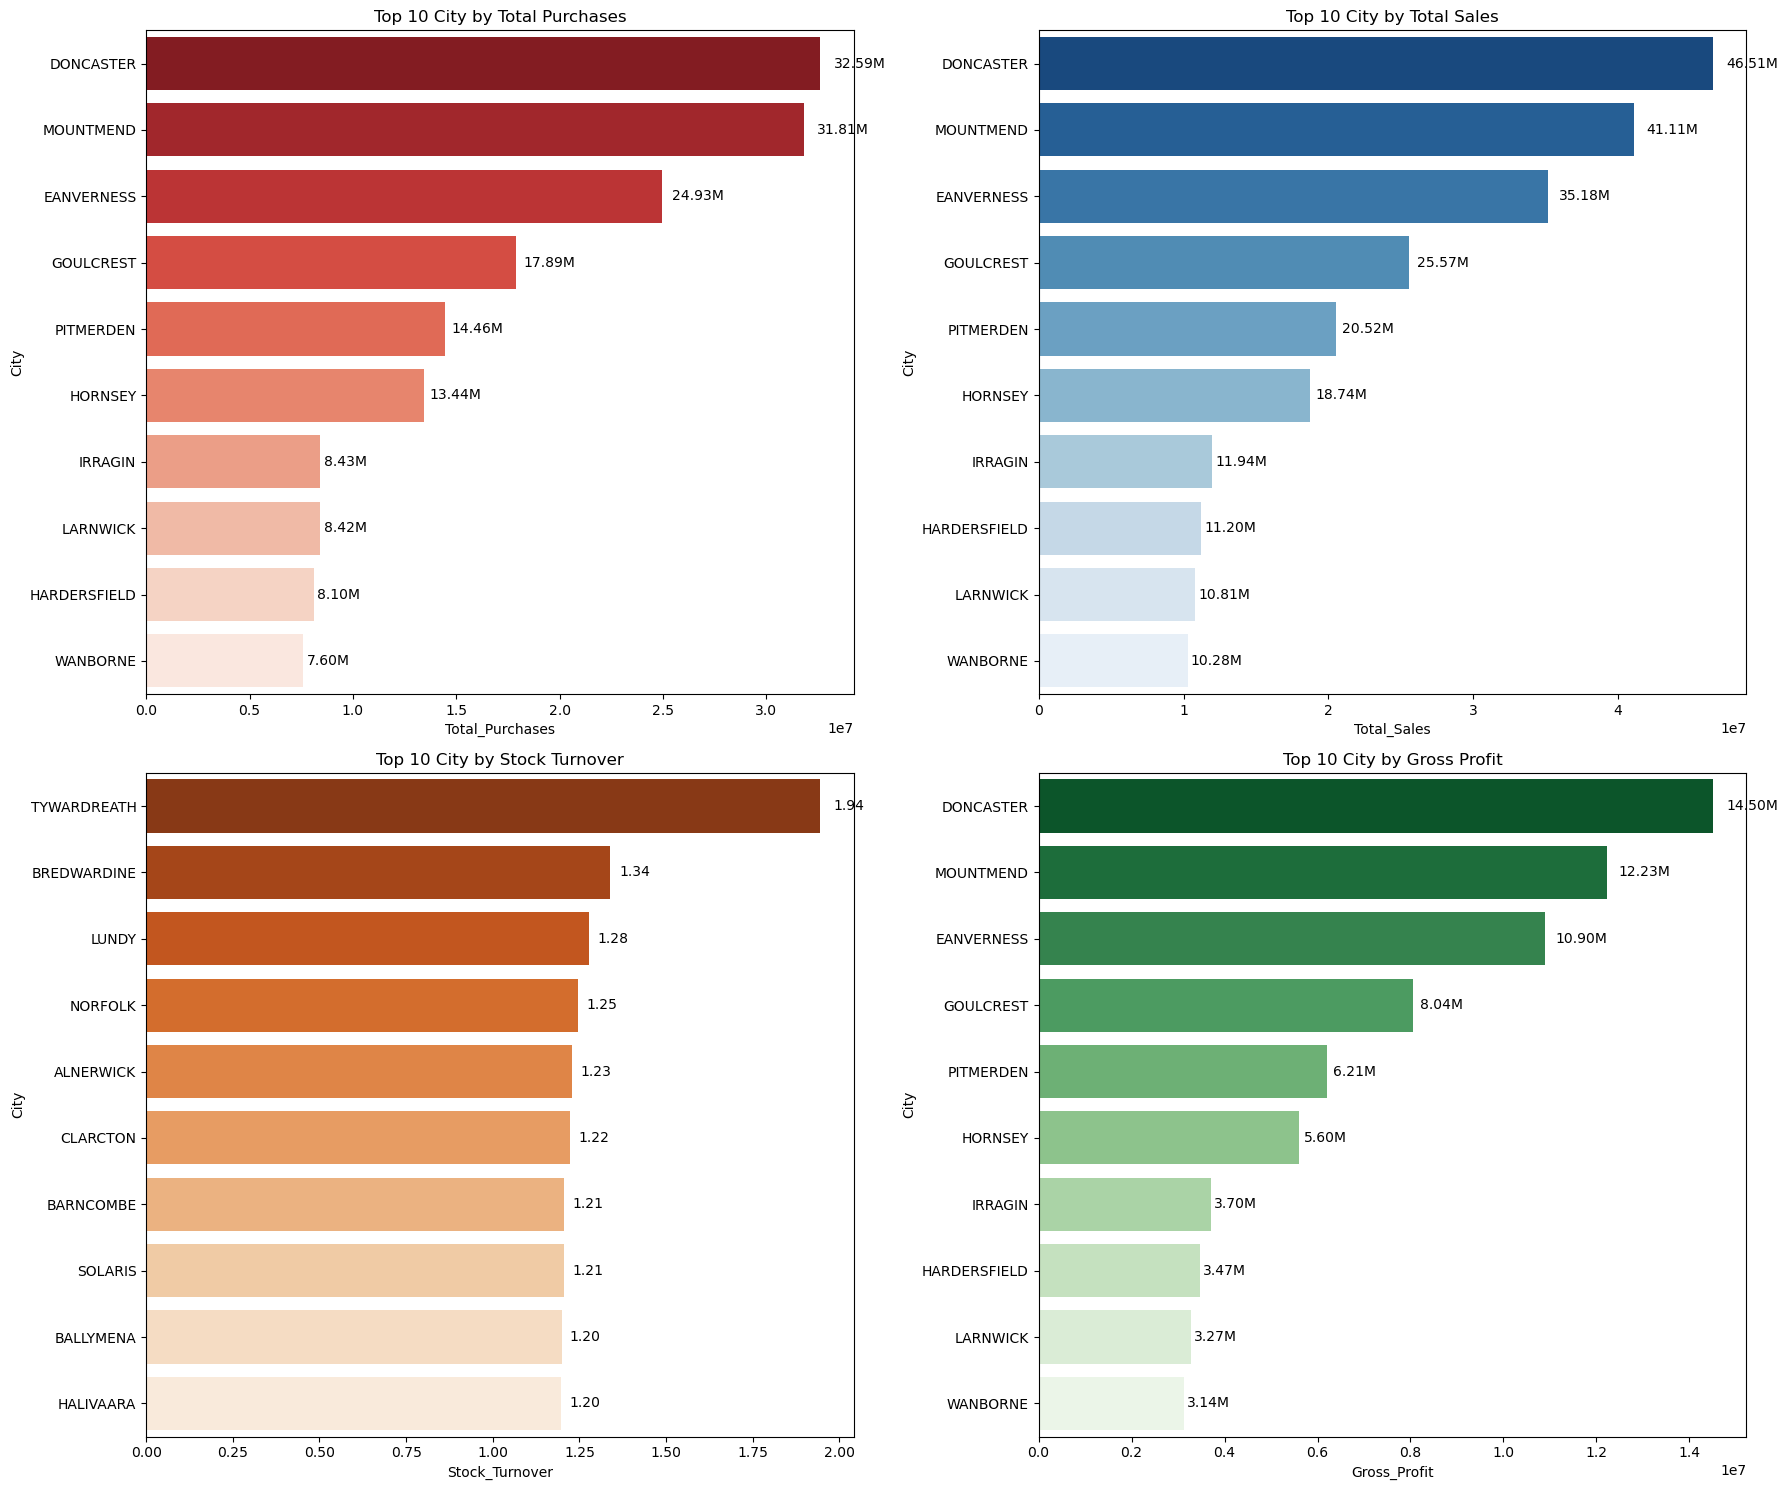

In [195]:
palette = ["Reds_r","Blues_r","Oranges_r","Greens_r"]
plt.figure(figsize=(18,15))

for i,col in enumerate(top_City.columns.values) :
    plt.subplot(2,2,i+1)
    ax1 = sns.barplot(y=top_City[col].sort_values(ascending=False).head(10).index,
                      x=top_City[col].sort_values(ascending=False).head(10).values,
                      palette=palette[i])
    ax1.set_xlabel(col)
    ax1.set_ylabel("City")
    plt.title(f"Top 10 City by {' '.join(col.split('_'))}")
    for bar in ax1.patches:
        value = format_dollar(bar.get_width()) if col in ['Total_Purchases', 'Total_Sales','Gross_Profit'] else f'{bar.get_width():.2f}'
        ax1.text(bar.get_width()*1.02,
                 bar.get_y()+bar.get_height()/2,
                 value,
                 ha='left',va='center',fontsize=10,color='black')
plt.tight_layout()
plt.show()

#### **City-wise Insights Based on Key Business Metrics**

**Cities with High Total Purchases and Sales**

* Stores located in **Doncaster**, **Mountmend**, and **Eanverness** exhibit both **high total purchases** and **high total sales**, highlighting their significance in overall revenue generation and inventory investment.

**Cities with High Stock Turnover (Legacy Stock Effect)**

* Stores in **Tywardreath**, **Bredwardine**, and **Lundy** report **stock turnover rates exceeding 1.25**, suggesting that inventory sold far outpaced purchases—likely due to the clearance of legacy or existing stock.

**Cities with Strong Gross Profit Performance**

* Once again, **Doncaster**, **Mountmend**, and **Eanverness** stand out by generating **gross profits exceeding \$10 million**, indicating strong sales of low-cost inventory at high markups, contributing significantly to overall profitability.



#### **Top 3 Cities**

In [201]:
# Step 1: Rank each city in descending order for each metric (higher is better)
purchase_rank = top_City["Total_Purchases"].rank(ascending=False)
sales_rank = top_City["Total_Sales"].rank(ascending=False)
turnover_rank = top_City["Stock_Turnover"].rank(ascending=False)
profit_rank = top_City["Gross_Profit"].rank(ascending=False)

# Step 2: Calculate the total rank by summing individual ranks
final_rank = (purchase_rank + sales_rank + turnover_rank + profit_rank)

# Step 3: Add final rank to the dataframe
top_City["Final_Rank"] = final_rank

# Step 4: Sort by Final Rank and select top 5
top_5_cities = top_City.sort_values("Final_Rank").head(3)

top_5_cities.map(format_dollar)

,Total_Purchases,Total_Sales,Stock_Turnover,Gross_Profit,Final_Rank
City,,,,,
DONCASTER,32.59M,46.51M,1.17,14.50M,21.00
EANVERNESS,24.93M,35.18M,1.18,10.90M,22.00
GOULCREST,17.89M,25.57M,1.17,8.04M,28.00


**Top 3 City Summary**

The **top 3 cities** based on combined performance in purchase volume, sales revenue, stock turnover, and gross profit are:

- **DONCASTER**  
- **EANVERNESS**  
- **GOULCREST**  

All of these cities have:

- **Total purchases exceeding \$17 million**
- **Total sales above \$25 million**
- **Average stock turnover greater than 1.15**
- **Gross profit exceeding \$8 million** in this financial year


### Does purchasing in bulk reduce the unit price , what is optimal purchase volumne for cost savings

In [217]:
df["Order_Size"] = pd.qcut(df.TotalPurchaseQuantity,q=3,labels=["Small","Medium","Large"])

In [230]:
Quantity_wise_metrics = df.groupby("Order_Size")[['PurchasePrice','AvgSalesPrice','GrossProfitMargin']].apply(lambda x : round(x.mean(),2))
Quantity_wise_metrics

,PurchasePrice,AvgSalesPrice,GrossProfitMargin
Order_Size,,,
Small,23.39,28.57,29.16
Medium,12.76,18.32,31.48
Large,9.30,13.50,31.37


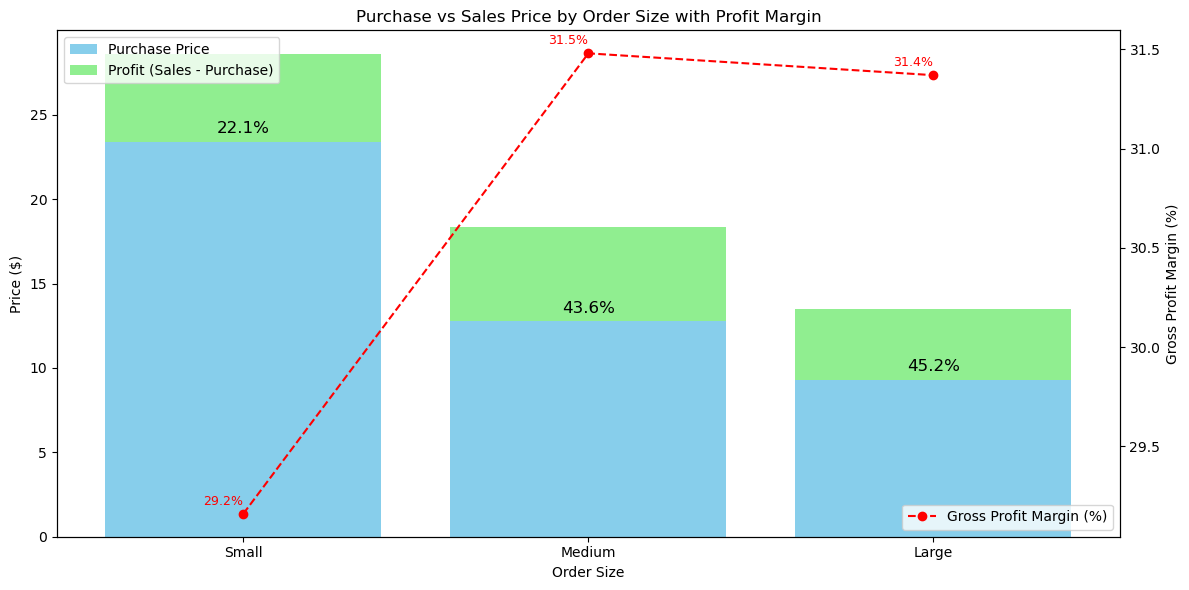

In [242]:
# Calculate the difference for label
difference = Quantity_wise_metrics['AvgSalesPrice'] - Quantity_wise_metrics['PurchasePrice']
percentage_diff = (difference / Quantity_wise_metrics['PurchasePrice']) * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Stacked bar chart
purchase_bars = ax1.bar(Quantity_wise_metrics.index, Quantity_wise_metrics['PurchasePrice'], label='Purchase Price', color='skyblue')
sales_bars = ax1.bar(Quantity_wise_metrics.index, difference, bottom=Quantity_wise_metrics['PurchasePrice'], label='Profit (Sales - Purchase)', color='lightgreen')

# Annotate the bars with percentage difference
for i, val in enumerate(percentage_diff):
    ax1.text(i, Quantity_wise_metrics['PurchasePrice'].iloc[i] + 0.5, f"{val:.1f}%", ha='center', fontsize=12)

# Labels and legend
ax1.set_ylabel("Price ($)")
ax1.set_xlabel("Order Size")
ax1.set_title("Purchase vs Sales Price by Order Size with Profit Margin")
ax1.legend(loc="upper left")

# Create secondary Y-axis for Gross Profit Margin
ax2 = ax1.twinx()
ax2.plot(Quantity_wise_metrics.index, Quantity_wise_metrics['GrossProfitMargin'], color='red', marker='o', linestyle='--', label='Gross Profit Margin (%)')
ax2.set_ylabel("Gross Profit Margin (%)")
ax2.legend(loc="lower right")

# Annotate the line with values
for i, val in enumerate(Quantity_wise_metrics['GrossProfitMargin']):
    ax2.text(i, val + 0.03, f"{val:.1f}%", color='red', fontsize=9, ha='right',va='bottom')

plt.tight_layout()
plt.show()


**Order Size Insights Summary**

* **Small Orders**

Small purchase quantities result in the **highest per-unit purchase cost** and the **lowest profit margin (\~29%)**, making them the least cost-efficient.
Sales price remains significantly higher than purchase, but margin gain is limited due to elevated input costs.

---

* **Medium Orders**

Medium-sized purchases offer the **most balanced pricing**, achieving the **highest gross profit margin (\~31.5%)** among all categories.
They provide an ideal trade-off between purchase cost and selling price, maximizing profitability per unit.

---

* **Large Orders**

Bulk purchases benefit from **lowest per-unit purchase costs** and still maintain a **strong profit margin (\~31.4%)**.
Despite slightly lower margin than medium, high volume and markup percentage make them highly profitable overall.


### Unsold Capital per Vendor

In [243]:
df["Unsold_Capital"] = np.where(df.TotalPurchaseQuantity < df.TotalSalesQuantity , 0 ,
                        (df.TotalPurchaseQuantity-df.TotalSalesQuantity)*df.PurchasePrice )

In [248]:
df.groupby("VendorName")[["TotalPurchaseQuantity","TotalSalesQuantity","Unsold_Capital"]].sum()\
    .sort_values("Unsold_Capital",ascending=False).head(10).map(format_dollar)

,TotalPurchaseQuantity,TotalSalesQuantity,Unsold_Capital
VendorName,,,
MARTIGNETTI COMPANIES,2.64M,2.54M,2.86M
DIAGEO NORTH AMERICA INC,5.46M,5.40M,2.76M
ULTRA BEVERAGE COMPANY LLP,1.08M,1.01M,1.96M
JIM BEAM BRANDS COMPANY,2.74M,2.62M,1.64M
PERNOD RICARD USA,1.65M,1.61M,1.28M
PERFECTA WINES,553.12K,496.18K,1.25M
M S WALKER INC,1.37M,1.32M,1.18M
CONSTELLATION BRANDS INC,2.33M,2.29M,838.87K
E & J GALLO WINERY,1.86M,1.80M,768.92K


**MARTIGNETTI COMPANIES** has the highest unsold capital amounting to **\$2.86M**,
followed by **DIAGEO NORTH AMERICA INC** with **\$2.76M**,
and **ULTRA BEVERAGE COMPANY LLP** with **\$1.96M**.

### 95% Confidence Interval for Profit Margins fro Top and Low performing vendors

In [252]:
top_vendors_profit = df[df.TotalSalesDollars > df.TotalSalesDollars.quantile(0.75)].GrossProfitMargin
low_vendors_profit = df[df.TotalSalesDollars < df.TotalSalesDollars.quantile(0.25)].GrossProfitMargin

In [260]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)  # Calculate sample mean
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error of the mean
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)  # t-score for given confidence
    margin_of_error = t_critical * std_err  # Calculate margin of error
    
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


Top Vendors 95% CI: (31.44, 31.56), Mean: 31.50
Low Vendors 95% CI: (28.15, 28.36), Mean: 28.25


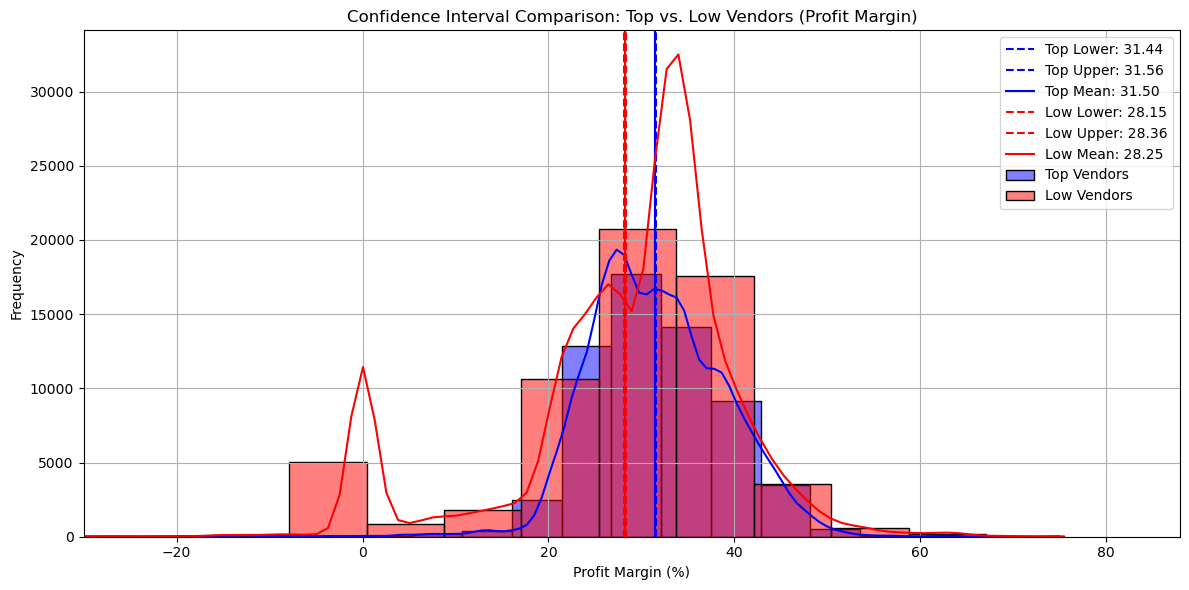

In [263]:
# Calculate confidence intervals
top_mean, top_lower, top_upper = confidence_interval(top_vendors_profit)
low_mean, low_lower, low_upper = confidence_interval(low_vendors_profit)

# Print confidence intervals
print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

# Plot
plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors_profit, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors_profit, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.xlim(left=-30)
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



#### **Confidence Interval Analysis Summary: Top vs. Low Vendors**

1. **Confidence Interval Comparison**\
   The 95% confidence interval for **Top Vendors** (31.44% – 31.56%) is **higher** than that of **Low Vendors** (28.15% – 28.36%), indicating a clear difference in average profit margins.

2. **Sales & Margin Relationship**\
   Vendors with **higher sales volumes (Top Vendors)** consistently show **higher profit margins**, while **Low Vendors** with lesser sales tend to have **lower margins**, suggesting a positive correlation between sales performance and margin efficiency.

3. **Top Vendors Suggestion**\
   Maintain current sales strategies and consider expanding product reach to leverage strong margins further.
   Focus on scaling high-margin items and strengthening vendor partnerships.

4. **Low Vendors Suggestion**\
   Reevaluate pricing, marketing, and inventory strategies to improve margin performance.
   Target cost reduction and analyze low-margin products for potential improvement or replacement.

### Hypothesis Test: Two-Sample T-Test for Profit Margins

**Null Hypothesis (H₀):** There is no significant difference between the profit margins of top vendors and low vendors.\
**Alternative Hypothesis (H₁):** There is a significant difference between the profit margins of top vendors and low vendors.

In [264]:

# Perform two-sample (independent) t-test
t_stat, p_value = stats.ttest_ind(top_vendors_profit, low_vendors_profit, equal_var=False)

# Print results
print("Two-Sample T-Test Results:")
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.5e}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis – significant difference in profit margins.")
else:
    print("Conclusion: Fail to reject the null hypothesis – no significant difference.")


Two-Sample T-Test Results:
t-statistic: 52.50
p-value: 0.00000e+00
Conclusion: Reject the null hypothesis – significant difference in profit margins.


**Since the p-value is extremely small (much less than 0.05), we reject the null hypothesis. This confirms that the difference in profit margins between top and low-performing vendors is statistically significant.**